In [140]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
import nltk
from scipy import stats
import re
from  scipy.stats import ttest_ind
from wordcloud import WordCloud

In [141]:
data=pd.read_csv('Data/cleanedData.csv')
data.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,%OfUpperCaseLetters,NoOfURL,AvgLengthOfEachWord,%OfNoOfStopWords,NoOfWords,%OfNoOfUniqueWords,AvgSentenceLength,TextStandard,CleanWordList
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,1.79,0,6.12,32.14,13,1.000,8.0,3.0,huh anyway check tube channel kobyoshi99
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,12.05,0,4.22,26.51,40,0.775,15.0,6.0,hey guy check new channel first vid u monkey '...


In [142]:
data.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'CLASS',
       '%OfUpperCaseLetters', 'NoOfURL', 'AvgLengthOfEachWord',
       '%OfNoOfStopWords', 'NoOfWords', '%OfNoOfUniqueWords',
       'AvgSentenceLength', 'TextStandard', 'CleanWordList'],
      dtype='object')

####  Correlation matrix

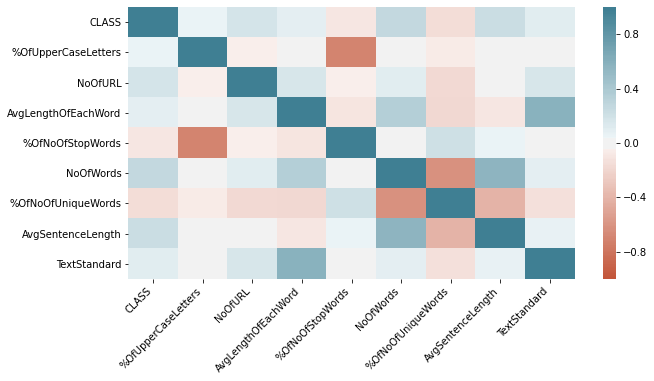

In [143]:
corr=data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=False
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [144]:
# filt=data['NoOfSentences']<3
# data.loc[filt,'SmogIndex'].value_counts()

In [145]:
# stats.pointbiserialr(data['CLASS'],data['CommentLength',])

In [146]:
# data['CommentLength'].value_counts().plot(kind='bar');

#### Distribution of engineered features across Spam and Ham comments

##### Distribution of Comment length in both the categories

In [147]:
y=data['CommentLength']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of comment length across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

KeyError: 'CommentLength'

##### Distribution of % of uppercase letters in both the categories

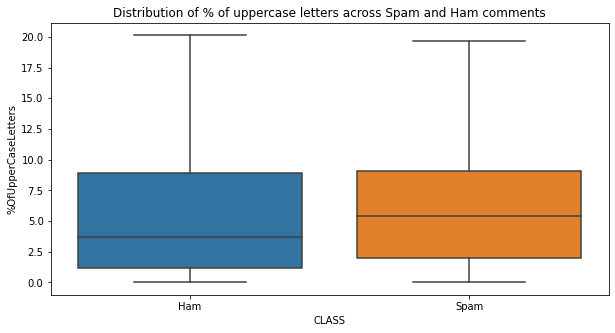

In [148]:
y=data['%OfUpperCaseLetters']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data,showfliers=False)
plt.title("Distribution of % of uppercase letters across Spam and Ham comments")
plt.xticks(ticks=(0,1), 
           labels=("Ham","Spam"));

Uppercase letter have similar distribution in Spam as well as in Ham comments.

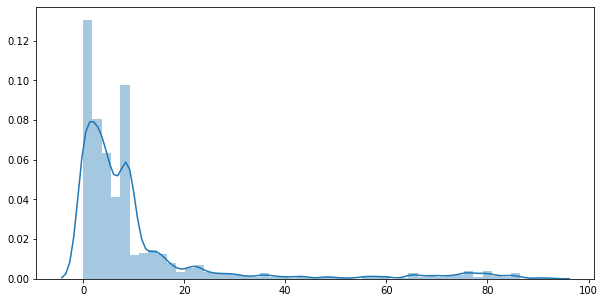

In [149]:
fig, ax = plt.subplots()

y0=data.loc[x==0,['%OfUpperCaseLetters']]
y1=data.loc[x==1,['%OfUpperCaseLetters']]

# sns.distplot(y0,ax=ax,label='Ham',)
sns.distplot(y1,ax=ax,label='Spam')

##### Distribution of No. of URLs in both the categories

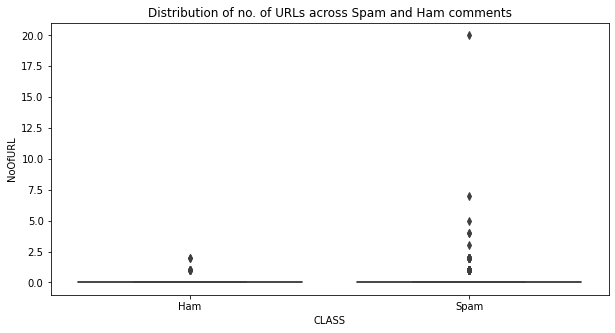

In [150]:
y=data['NoOfURL']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of URLs across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

Let's remove the outlier here and then check the distribution

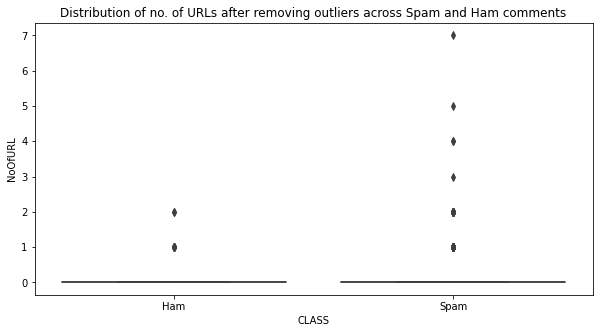

In [151]:
# After removing the outlier with NoOfUrls >10
filt=data['NoOfURL']<10
y=data.loc[filt,'NoOfURL']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of URLs after removing outliers across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

##### Distribution of average length of words in both the categories

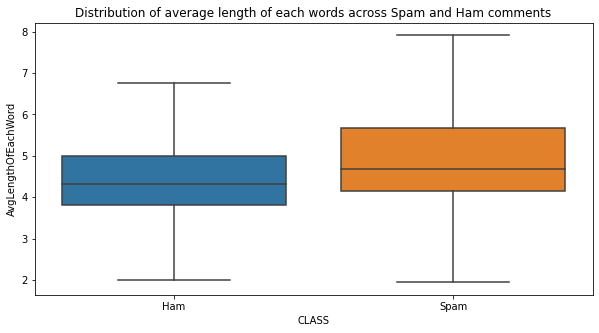

In [152]:
y=data['AvgLengthOfEachWord']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data, showfliers = False)
plt.title("Distribution of average length of each words across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

In [153]:
filt1=data['AvgLengthOfEachWord']<600 
filt2=data['CLASS']==0
filt3=data['CLASS']==1
y_ham=data.loc[filt2,'AvgLengthOfEachWord']
y_spam=data.loc[filt3,'AvgLengthOfEachWord']

y_ham.quantile(q=[.25,.50,.75])
y_spam.quantile(q=[.25,.50,.75])

df_values2={'Ham':y_ham.quantile(q=[.25,.50,.75]),
      'Spam':y_spam.quantile(q=[.25,.50,.75])}

pd.DataFrame(df_values2).reset_index().rename(columns={'index':'Quantile'})

,Quantile,Ham,Spam
0,0.25,3.80,4.14
1,0.50,4.33,4.67
2,0.75,5.00,5.67


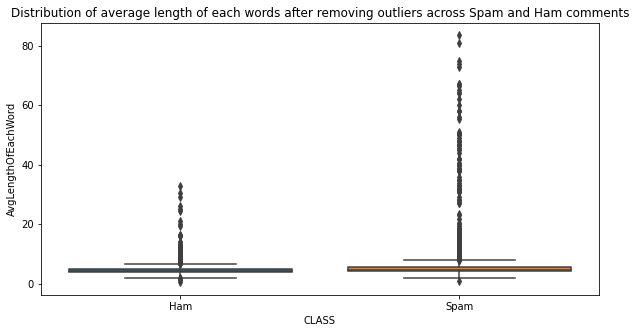

In [154]:
# After removing the outlier 
filt=data['AvgLengthOfEachWord']<150
y=data.loc[filt,'AvgLengthOfEachWord']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of average length of each words after removing outliers across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

Spam comments are clearly have lengthier words than Ham comments.

##### Distribution of No. of stop words in both the categories

In [155]:
y=data['NoOfStopWords']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of stopwords across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

KeyError: 'NoOfStopWords'

Spam comments are lengthier than ham comments hence it makes sense that there are more stopwords in spam comments.

##### Distribution of No. of sentences in both the categories

In [156]:
y=data['NoOfSentences']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of sentences across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

KeyError: 'NoOfSentences'

Let's redraw the chart after removing records with more that 15 sentences.

In [157]:
# After removing the outlier 
filt=data['NoOfSentences']<15
y=data.loc[filt,'NoOfSentences']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of sentences after removing outliers across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

KeyError: 'NoOfSentences'

In [158]:
filt1=data['NoOfSentences']<15 
filt2=data['CLASS']==0
filt3=data['CLASS']==1
y_ham=data.loc[filt1 & filt2,'NoOfSentences']
y_spam=data.loc[filt1 & filt3,'NoOfSentences']

y_ham.quantile(q=[.25,.50,.75])
y_spam.quantile(q=[.25,.50,.75])

df_values={'Ham':y_ham.quantile(q=[.25,.50,.75]),
          'Spam':y_spam.quantile(q=[.25,.50,.75])}

pd.DataFrame(df_values)

KeyError: 'NoOfSentences'

After removing the outliers, both the categories have similar distribution for no. of sentences.

##### Distribution of No. of words in both the categories

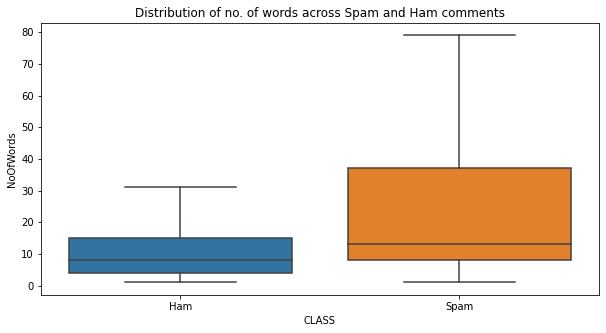

In [159]:
y=data['NoOfWords']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data,showfliers=False)
plt.title("Distribution of no. of words across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

There clearly seems to be an outlier in  Spam comments. 
Lets redraw the box plot after excluding the outlier.

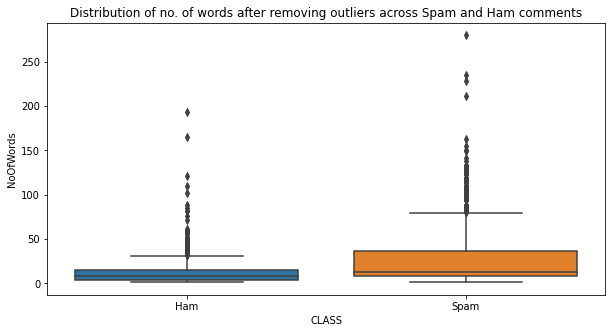

In [160]:
filt=data['NoOfWords']<400
y=data.loc[filt,'NoOfWords']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of no. of words after removing outliers across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

In [161]:
filt1=data['NoOfWords']
filt2=data['CLASS']==0
filt3=data['CLASS']==1
y_ham=data.loc[filt1 & filt2,'NoOfWords']
y_spam=data.loc[filt1 & filt3,'NoOfWords']

y_ham.quantile(q=[.25,.50,.75])
y_spam.quantile(q=[.25,.50,.75])

df_values2={'Ham':y_ham.quantile(q=[.25,.50,.75]),
      'Spam':y_spam.quantile(q=[.25,.50,.75])}

pd.DataFrame(df_values2).reset_index().rename(columns={'index':'Quantile'})

,Quantile,Ham,Spam
0,0.25,4.5,7.0
1,0.50,9.0,17.0
2,0.75,15.0,49.0


The boxlplot and quantile values clearly shows that the spammy comments are more wordy. 


##### Distribution of No. of unique words in both the categories

In [162]:
y=data['NoOfUniqueWords']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of No. of unique words across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

KeyError: 'NoOfUniqueWords'

In [163]:
filt1=data['CLASS']==0
filt2=data['CLASS']==1
y_ham=data.loc[filt1,'NoOfUniqueWords']
y_spam=data.loc[filt2,'NoOfUniqueWords']

# y_ham.quantile(q=[.25,.50,.75])
# y_spam.quantile(q=[.25,.50,.75])

df_values3={'Ham':y_ham.quantile(q=[.25,.50,.75]),
      'Spam':y_spam.quantile(q=[.25,.50,.75])}

pd.DataFrame(df_values3)

KeyError: 'NoOfUniqueWords'

Spam comments have almost twice unique words than ham comments. 

##### Distribution of Text Standard in both the categories

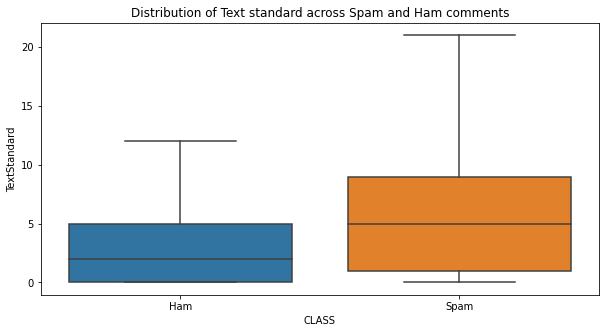

In [164]:
y=data['TextStandard']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data,showfliers=False)
plt.title("Distribution of Text standard across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

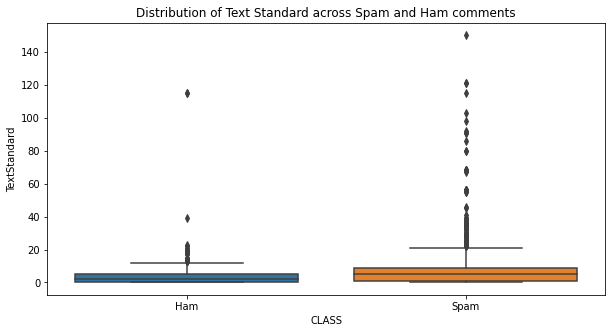

In [165]:
filt=data['TextStandard']<200
y=data.loc[filt,'TextStandard']
x=data['CLASS']

sns.boxplot(x=x,y=y,data=data)
plt.title("Distribution of Text Standard across Spam and Ham comments")
plt.xticks(ticks=(0,1),
           labels=("Ham","Spam"));

In [166]:
filt1=data['TextStandard']<600 
filt2=data['CLASS']==0
filt3=data['CLASS']==1
y_ham=data.loc[filt1 & filt2,'TextStandard']
y_spam=data.loc[filt1 & filt3,'TextStandard']

y_ham.quantile(q=[.25,.50,.75])
y_spam.quantile(q=[.25,.50,.75])

df_values2={'Ham':y_ham.quantile(q=[.25,.50,.75]),
      'Spam':y_spam.quantile(q=[.25,.50,.75])}

pd.DataFrame(df_values2).reset_index().rename(columns={'index':'Quantile'})

,Quantile,Ham,Spam
0,0.25,0.0,1.0
1,0.50,2.0,5.0
2,0.75,5.0,9.0


#### **Hypothesis Testing**

H0= There is no difference in **engineered feature** in Spam or Ham comments

H1= There is difference

In [167]:
# cols=['CommentLength','%OfUpperCaseLetters', 'NoOfURL', 'AvgLengthOfEachWord',
#        'NoOfStopWords', 'NoOfSentences', 'NoOfWords', 'NoOfUniqueWords',
#        'FleschReadingEase', 'GunningFog', 'SmogIndex', 'ARI',
#        'ColemanLiauIndex', 'TextStandard', 'AvgSentenceLength']
cols=['AvgLengthOfEachWord',
       'NoOfWords', 'TextStandard']
c={'Feature':[],'t':[],'p_value':[]}

filt1=data['CLASS']==0
filt2=data['CLASS']==1

for col in cols:
    data_ham=data.loc[filt1,col]
    data_spam=data.loc[filt2,col]
    t, p_value = ttest_ind(data_ham,data_spam ,equal_var = False)
    c['Feature'].append(col)
    c['t'].append(t)
    c['p_value'].append(p_value)

t_pvalue=pd.DataFrame.from_dict(c)
t_pvalue.sort_values(by=['Feature'],ascending=True)

,Feature,t,p_value
0,AvgLengthOfEachWord,-4.298844,1.867488e-05
1,NoOfWords,-12.774950,2.916835e-35
2,TextStandard,-5.119249,3.637132e-07


In all the cases, p_value is close to 0 and hence we **reject the null hypothesis** and can say that there is difference in values for all the engineered features in spam and ham comments.

#### Analyze most frequent words

In [173]:
data.shape

(1956, 14)

In [174]:
data.dropna(subset=['CleanWordList'],inplace=True)

In [175]:
data.shape

(1903, 14)

In [176]:
wordFreqDict={}
for wordlist in data['CleanWordList']:
    for word in wordlist.split(' '):
        if word not in wordFreqDict:
            wordFreqDict[word]=1
        else:
            wordFreqDict[word]+=1


df_mostFrequentWords=pd.DataFrame.from_dict(wordFreqDict,orient='index',columns=['wordFrequency'])

df_mostFrequentWords.sort_values(by=['wordFrequency'],ascending=False,inplace=True)
df_mostFrequentWords.reset_index(inplace=True)
df_mostFrequentWords.rename(columns={'index':'word'},inplace=True)
df_mostFrequentWords.head(15)

,word,wordFrequency
0,check,530
1,video,355
2,99,350
3,song,334
4,like,264
5,please,242
6,youtube,239
7,subscribe,234
8,love,215
9,...,206


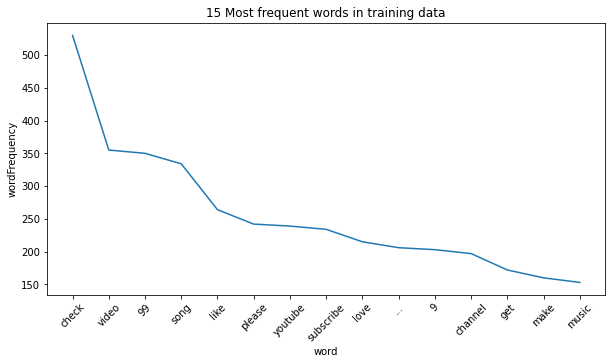

In [177]:
sns.lineplot(x=df_mostFrequentWords['word'].head(15),y=df_mostFrequentWords['wordFrequency'].head(15),sort=False)
plt.title('15 Most frequent words in training data')
plt.xticks(rotation=45);

- 999 is digit. We wil have to remove this before ML.
- ... can also be removed as it is just noise.

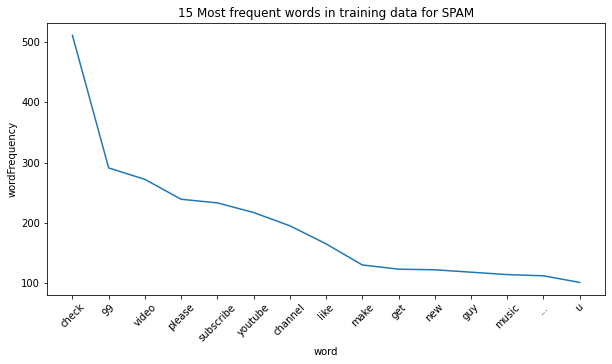

In [181]:
wordFreqDict={}
for wordlist in data.loc[data['CLASS']==1,'CleanWordList']:
    for word in wordlist.split(' '):
        if word not in wordFreqDict:
            wordFreqDict[word]=1
        else:
            wordFreqDict[word]+=1


df_mostFrequentWords=pd.DataFrame.from_dict(wordFreqDict,orient='index',columns=['wordFrequency'])

df_mostFrequentWords.sort_values(by=['wordFrequency'],ascending=False,inplace=True)
df_mostFrequentWords.reset_index(inplace=True)
df_mostFrequentWords.rename(columns={'index':'word'},inplace=True)
df_mostFrequentWords.head(15)

sns.lineplot(x=df_mostFrequentWords['word'].head(15),y=df_mostFrequentWords['wordFrequency'].head(15),sort=False)
plt.title('15 Most frequent words in training data for SPAM')
plt.xticks(rotation=45);

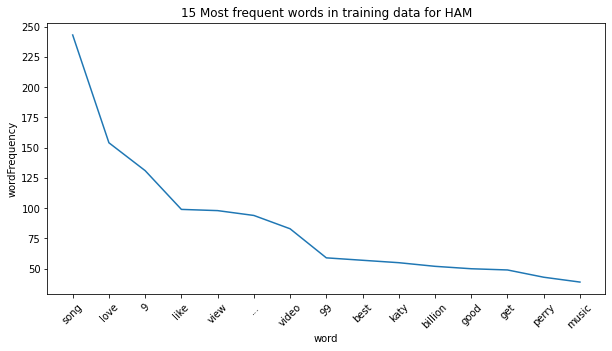

In [182]:
wordFreqDict={}
for wordlist in data.loc[data['CLASS']==0,'CleanWordList']:
    for word in wordlist.split(' '):
        if word not in wordFreqDict:
            wordFreqDict[word]=1
        else:
            wordFreqDict[word]+=1


df_mostFrequentWords=pd.DataFrame.from_dict(wordFreqDict,orient='index',columns=['wordFrequency'])

df_mostFrequentWords.sort_values(by=['wordFrequency'],ascending=False,inplace=True)
df_mostFrequentWords.reset_index(inplace=True)
df_mostFrequentWords.rename(columns={'index':'word'},inplace=True)
df_mostFrequentWords.head(15)

sns.lineplot(x=df_mostFrequentWords['word'].head(15),y=df_mostFrequentWords['wordFrequency'].head(15),sort=False)
plt.title('15 Most frequent words in training data for HAM')
plt.xticks(rotation=45);